<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-download" data-toc-modified-id="Data-download-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data download</a></span></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Analysis</a></span><ul class="toc-item"><li><span><a href="#get-decorrelation-parameters" data-toc-modified-id="get-decorrelation-parameters-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>get decorrelation parameters</a></span></li><li><span><a href="#setup-fit" data-toc-modified-id="setup-fit-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>setup fit</a></span></li><li><span><a href="#load-result" data-toc-modified-id="load-result-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>load result</a></span></li><li><span><a href="#result-comparison" data-toc-modified-id="result-comparison-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>result comparison</a></span></li></ul></li></ul></div>

# KELT-20: CHEOPS occultations

In [48]:
import numpy as np
import CONAN3
import matplotlib.pyplot as plt

In [2]:
CONAN3.__version__

'3.1.1'

## Data download

In [3]:
from CONAN3.get_files import get_CHEOPS_data
df = get_CHEOPS_data("KELT-20")
df.search( filters = { "pi_name"         : {"contains":["LENDL"]}, 
                       "data_arch_rev"   : {"equal":[3]},
                       "status_published": {"equal":[True]}
                     })

  obj_id_catname                    file_key       pi_name  date_mjd_start  \
0        KELT-20  CH_PR100016_TG014101_V0300  Monika LENDL    59390.531256   
1        KELT-20  CH_PR100016_TG014102_V0300  Monika LENDL    59407.951403   
2        KELT-20  CH_PR100016_TG014103_V0300  Monika LENDL    59425.294447   
3        KELT-20  CH_PR100016_TG014104_V0300  Monika LENDL    59439.168753   
4        KELT-20  CH_PR100016_TG014105_V0300  Monika LENDL    59762.250712   
5        KELT-20  CH_PR100016_TG014106_V0300  Monika LENDL    59776.167371   
6        KELT-20  CH_PR100016_TG014107_V0300  Monika LENDL    59800.485426   

  obs_total_exptime  data_arch_rev  status_published  
0              36.0              3              True  
1              36.0              3              True  
2              36.0              3              True  
3              36.0              3              True  
4              36.0              3              True  
5              36.0              3           

download the first 4 occultation light curves

downloaded lightcurve with file key: CH_PR100016_TG014101_V0300, aperture: DEFAULT
downloaded lightcurve with file key: CH_PR100016_TG014102_V0300, aperture: DEFAULT
downloaded lightcurve with file key: CH_PR100016_TG014103_V0300, aperture: DEFAULT
downloaded lightcurve with file key: CH_PR100016_TG014104_V0300, aperture: DEFAULT


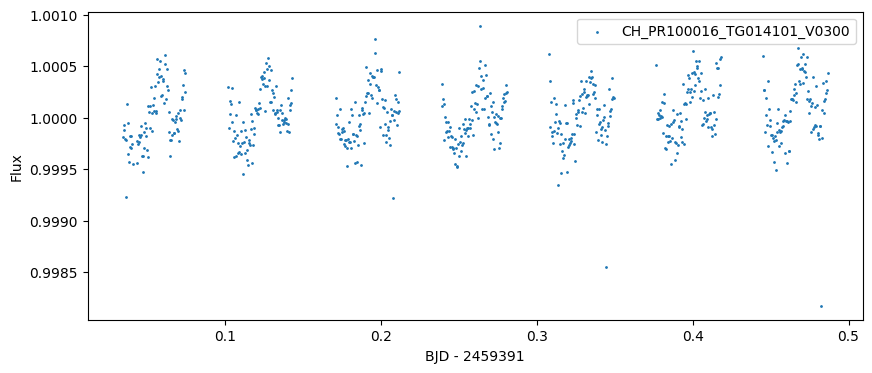

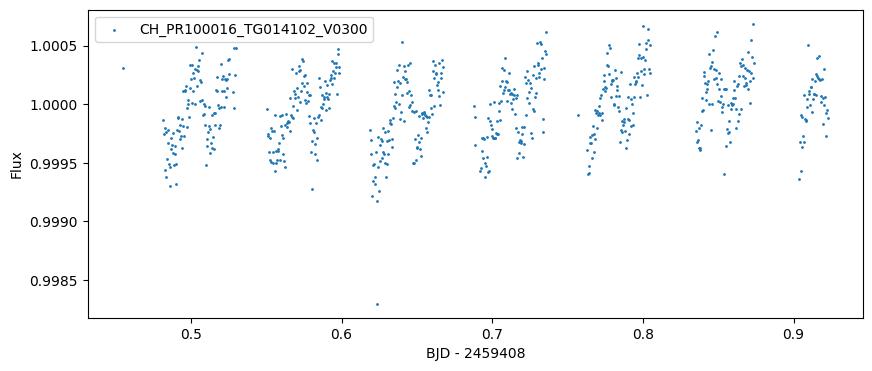

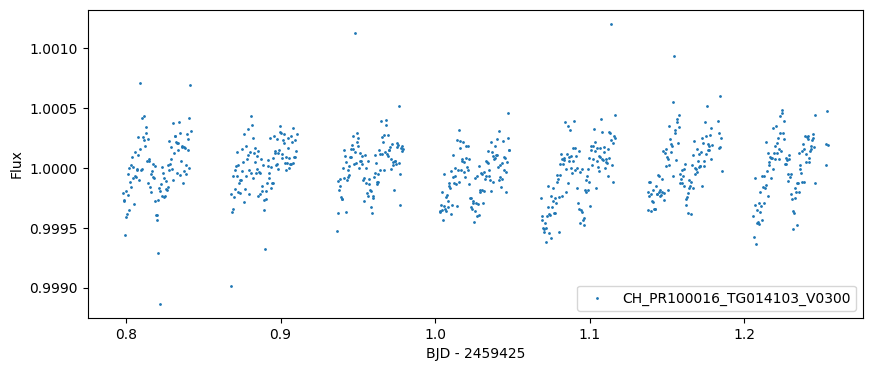

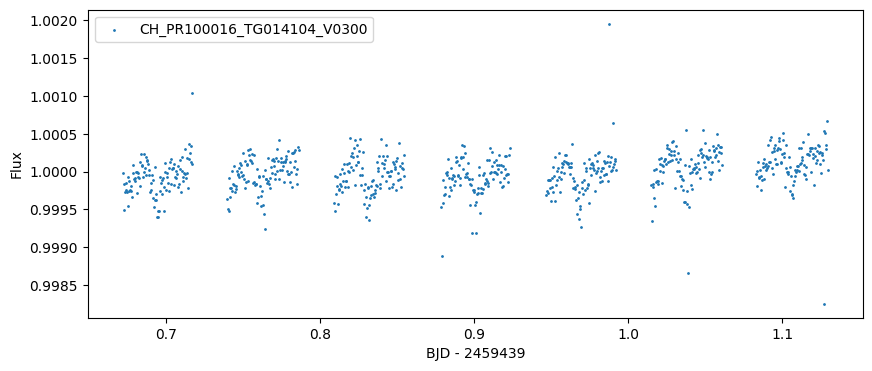

saved file as data/KELT-20_014101.dat
saved file as data/KELT-20_014102.dat
saved file as data/KELT-20_014103.dat
saved file as data/KELT-20_014104.dat


In [4]:
df.download(file_keys=df.file_keys[:4], aperture="DEFAULT")
df.scatter()
df.save_CONAN_lcfile(bjd_ref = 2457000, folder="data")

## Data Analysis

In [5]:
from glob import glob
import os
from os.path import basename
import pandas as pd

In [6]:
path = "data/"
lcs = sorted(glob(f"{path}KELT-20*"), key=os.path.getmtime)
lc_list = [basename(lc) for lc in lcs]
lc_list = lc_list

lc_list

['KELT-20_014101.dat',
 'KELT-20_014102.dat',
 'KELT-20_014103.dat',
 'KELT-20_014104.dat']

In [7]:
P     = 3.474074 
BJD_0 = 2459406.927174 - 2457000

In order to derive different occultation depths for the observations, we will set different filters

In [8]:
lc_obj = CONAN3.load_lightcurves(lc_list, path, 
                                 filters = [f"CH{i+1}" for i in range(len(lc_list))],
                                 lamdas  = 0.6)
lc_obj

# ============ Input lightcurves, filters baseline function =======================================================
name               filt 𝜆_𝜇m |s_samp  clip    scl_col |col0 col3 col4 col5 col6 col7|sin id GP spline_config  
KELT-20_014101.dat CH1  0.6  |None    None    None    |   0    0    0    0    0    0|  0  1 n  None           
KELT-20_014102.dat CH2  0.6  |None    None    None    |   0    0    0    0    0    0|  0  2 n  None           
KELT-20_014103.dat CH3  0.6  |None    None    None    |   0    0    0    0    0    0|  0  3 n  None           
KELT-20_014104.dat CH4  0.6  |None    None    None    |   0    0    0    0    0    0|  0  4 n  None           


lightcurves from filepath: data/
1 transiting planet(s)
Order of unique filters: ['CH1', 'CH2', 'CH3', 'CH4']

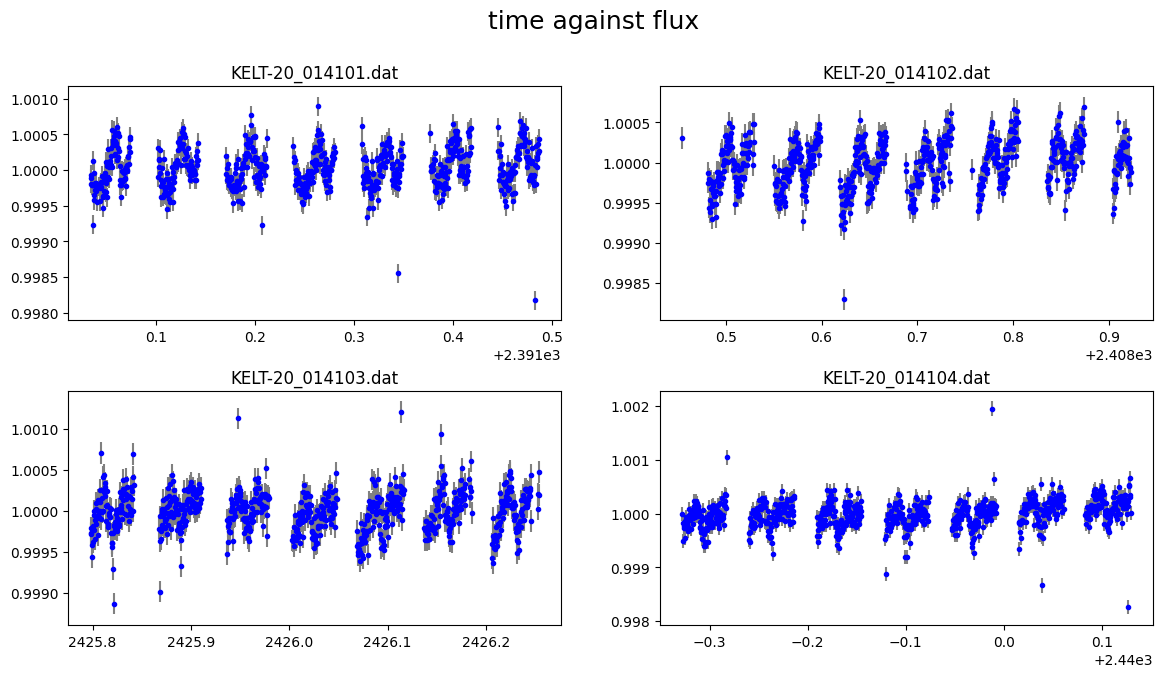

In [9]:
lc_obj.plot()

In [10]:
lc_obj.clip_outliers(show_plot=False)


KELT-20_014101.dat: Rejected 4 points more than 5.0 x MAD from the median

KELT-20_014102.dat: Rejected 2 points more than 5.0 x MAD from the median

KELT-20_014103.dat: Rejected 6 points more than 5.0 x MAD from the median

KELT-20_014104.dat: Rejected 8 points more than 5.0 x MAD from the median


Notice the strong systematics in the `CHEOPS` lightcurves. they are mostly due to to correlation with the spacecraft roll angle (which is stored in column 5 of the data). we can visualize this correlation by plotting column 5 against the flux

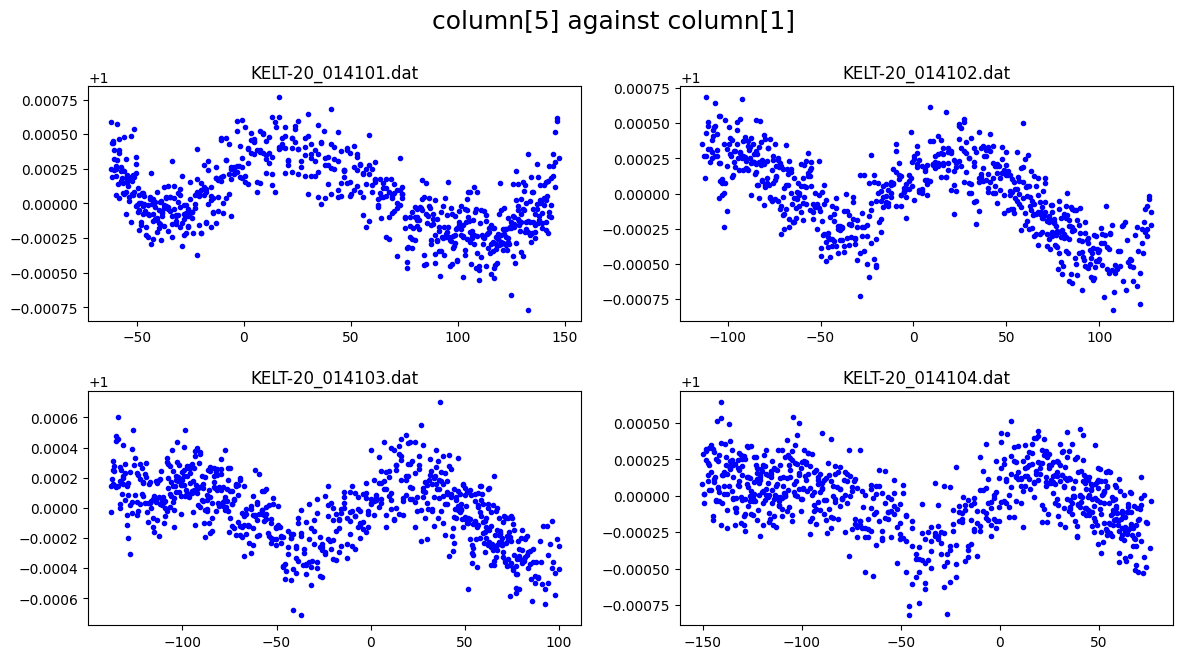

In [11]:
lc_obj.plot(plot_cols=(5,1))

Several CHEOPS papers use a combination of sines and cosines of the roll-angle (and the harmonics) to model this. Here, we will use CONAN to fit a spline model to the roll-angle correlation

In [12]:
lc_obj.add_spline(lc_list="all", par="col5", degree=3, knot_spacing=30 )

KELT-20_014101.dat – Adding a degree 3 spline to fit col5: knot spacing = 30 --> [c5:d3k30]
KELT-20_014102.dat – Adding a degree 3 spline to fit col5: knot spacing = 30 --> [c5:d3k30]
KELT-20_014103.dat – Adding a degree 3 spline to fit col5: knot spacing = 30 --> [c5:d3k30]
KELT-20_014104.dat – Adding a degree 3 spline to fit col5: knot spacing = 30 --> [c5:d3k30]
# ============ Input lightcurves, filters baseline function =======================================================
name               filt 𝜆_𝜇m |s_samp  clip    scl_col |col0 col3 col4 col5 col6 col7|sin id GP spline_config  
KELT-20_014101.dat CH1  0.6  |None    W15C5   None    |   0    0    0    0    0    0|  0  1 n  c5:d3k30       
KELT-20_014102.dat CH2  0.6  |None    W15C5   None    |   0    0    0    0    0    0|  0  2 n  c5:d3k30       
KELT-20_014103.dat CH3  0.6  |None    W15C5   None    |   0    0    0    0    0    0|  0  3 n  c5:d3k30       
KELT-20_014104.dat CH4  0.6  |None    W15C5   None    |   0    0    0   

In [13]:
lc_obj.setup_phasecurve(D_occ=[(-100e-6, 0, 300e-6)])

# ============ Phase curve setup ================================================================================ 
filt  param   fit 	prior
CH1   D_occ   y   	U(-0.0001,0,0.0003)
CH2   D_occ   y   	U(-0.0001,0,0.0003)
CH3   D_occ   y   	U(-0.0001,0,0.0003)
CH4   D_occ   y   	U(-0.0001,0,0.0003)
-------
CH1   A_pc    n   	F(0)
CH2   A_pc    n   	F(0)
CH3   A_pc    n   	F(0)
CH4   A_pc    n   	F(0)
-------
CH1   ph_off  n   	F(0)
CH2   ph_off  n   	F(0)
CH3   ph_off  n   	F(0)
CH4   ph_off  n   	F(0)


### get decorrelation parameters

In [14]:
tra_occ_pars =dict(T_0          = BJD_0,      
                    Period      = P,          
                    rho_star    = 0.76,       
                    Impact_para = 0.515,      
                    RpRs        = 0.11572, 
                    D_occ       = (-100e-6, 0, 300e-6) )


getting decorrelation parameters for lc: KELT-20_014101.dat (spline=True,s_samp=False)
BEST BIC:851.49, pars:['A0', 'A7', 'B6']

getting decorrelation parameters for lc: KELT-20_014102.dat (spline=True,s_samp=False)
BEST BIC:908.48, pars:['B7']

getting decorrelation parameters for lc: KELT-20_014103.dat (spline=True,s_samp=False)
BEST BIC:836.82, pars:['A7', 'A4']

getting decorrelation parameters for lc: KELT-20_014104.dat (spline=True,s_samp=False)
BEST BIC:913.82, pars:['A0', 'A7', 'A4']


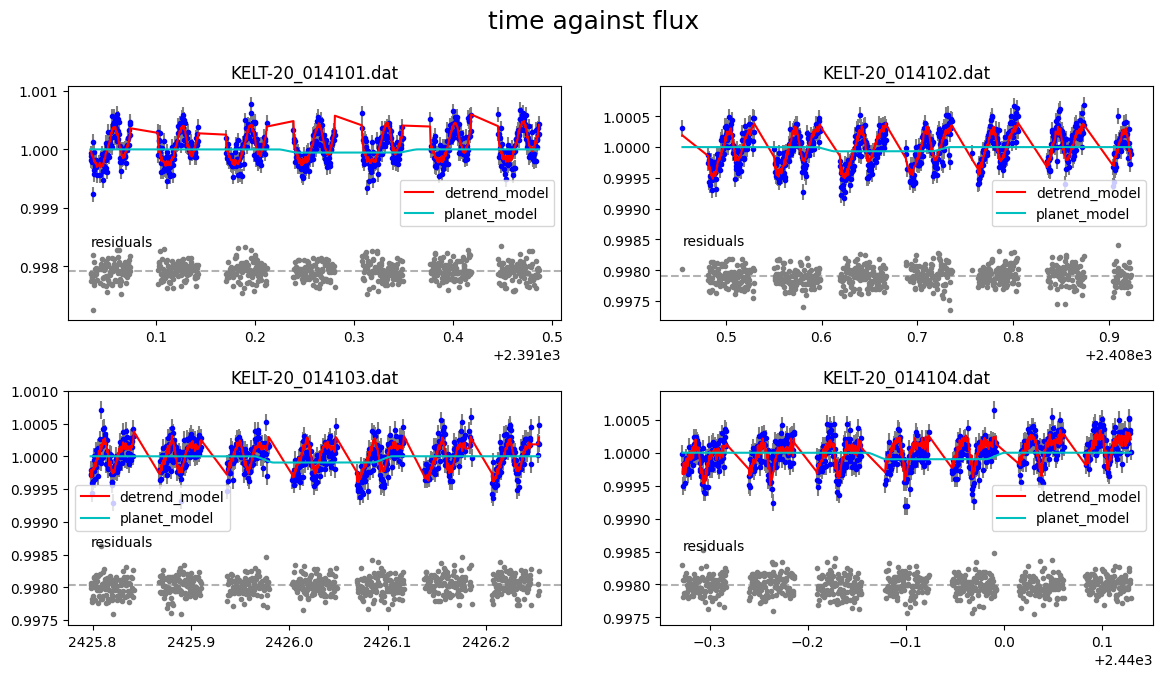


Setting-up spline for decorrelation. Use `.add_spline(None)` method to remove/modify

Setting-up baseline model from result
# ============ Input lightcurves, filters baseline function =======================================================
name               filt 𝜆_𝜇m |s_samp  clip    scl_col |col0 col3 col4 col5 col6 col7|sin id GP spline_config  
KELT-20_014101.dat CH1  0.6  |None    W15C5   None    |   1    0    0    0    2    1|  0  1 n  c5:d3k30.0     
KELT-20_014102.dat CH2  0.6  |None    W15C5   None    |   0    0    0    0    0    2|  0  2 n  c5:d3k30.0     
KELT-20_014103.dat CH3  0.6  |None    W15C5   None    |   0    0    1    0    0    1|  0  3 n  c5:d3k30.0     
KELT-20_014104.dat CH4  0.6  |None    W15C5   None    |   1    0    1    0    0    1|  0  4 n  c5:d3k30.0     

Note: GP flag for the lcs has been set to ['n', 'n', 'n', 'n']. Use `._useGPphot` attribute to modify this list with 'y','ce' or 'n' for each loaded lc


Setting-up transit pars from input values
# =====

In [15]:
# we can exclude column 5 from the decorrelations since we have setup a spline in this column
# we can also setup the planet parameters using the same input from tra_occ_pars

decorr_res = lc_obj.get_decorr( **tra_occ_pars, delta_BIC=-5, 
                               exclude_cols=[5],
                               setup_planet=True)


Let's see how well the spline models the roll-angle correlations

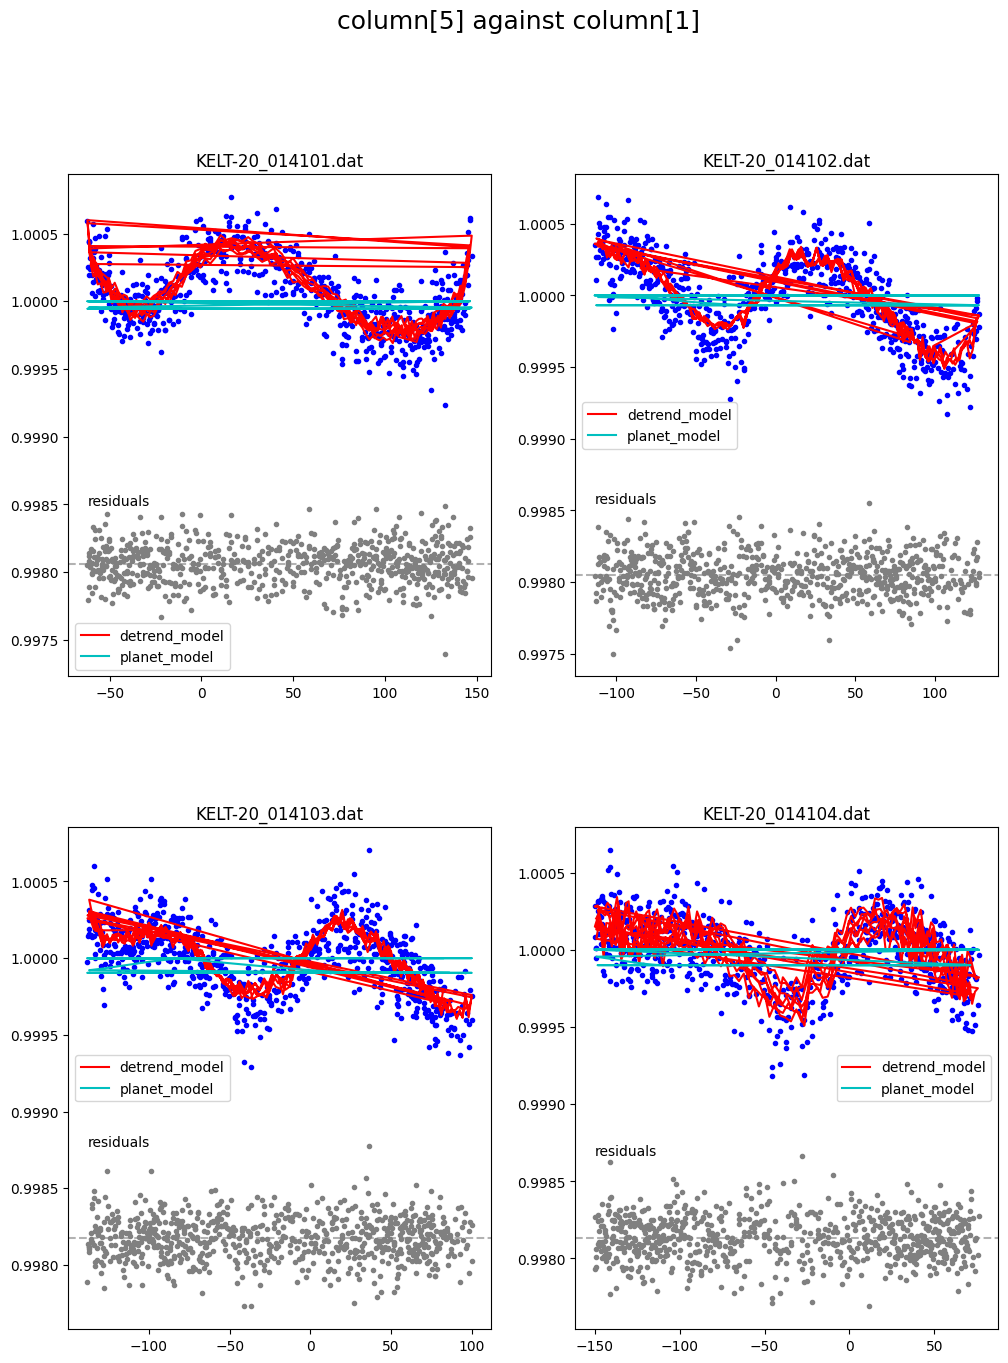

In [16]:
lc_obj.plot((5,1), show_decorr_model=True, figsize=(12,15))

very nice !!!

### setup fit

In [17]:
fit_obj = CONAN3.fit_setup(R_st=(1.617,0.05))

fit_obj.sampling(sampler="emcee",n_cpus=10, n_burn=2000, n_steps=1000, n_chains=64)

# ============ Stellar input properties ======================================================================
# parameter     value 
Radius_[Rsun]  N(1.617,0.050)
Mass_[Msun]    N(1.000,0.010)
Input_method:[R+rho(Rrho), M+rho(Mrho)]: Rrho
# ============ FIT setup =====================================================================================
Number_steps                       1000 
Number_chains                      64 
Number_of_processes                10 
Burnin_length                      2000 
n_live                             300 
force_nlive                        False 
d_logz                             0.1 
Sampler[emcee/dynesty]             emcee 
emcee_move[stretch/demc/snooker]   stretch 
leastsq_for_basepar                n 
apply_LCjitter                     y 
apply_RVjitter                     y 
LCjitter_loglims                   [-15, -4] 
RVjitter_lims                      [0, 5] 
LCbasecoeff_lims                   [-1, 1] 
RVbasecoeff_lims                  

In [18]:
result = CONAN3.run_fit(lc_obj, None, fit_obj, 
                        out_folder="result_KELT20", rerun_result=True)

Fit result already exists in this folder: result_KELT20.
Rerunning with results to generate plots and files...

CONAN fit launched!!!

Setting up photometry arrays ...
Setting up Spline fitting for LCS ...
Plotting prior distributions

Plotting initial guess
---------------------------

============ Samping started ... (using emcee)======================
No of dimensions:  19
No of chains:  64
fitting parameters:  ['CH1_DFocc' 'CH2_DFocc' 'CH3_DFocc' 'CH4_DFocc' 'lc1_logjitter'
 'lc2_logjitter' 'lc3_logjitter' 'lc4_logjitter' 'lc1_A0' 'lc1_A6'
 'lc1_B6' 'lc1_A7' 'lc2_A7' 'lc2_B7' 'lc3_A4' 'lc3_A7' 'lc4_A0' 'lc4_A4'
 'lc4_A7']

Skipping burn-in and production. Loading chains from disk
saved 2 burn-in chain plots as result_KELT20/burnin_chains_*.png

Emcee production chain written to disk as result_KELT20/chains_dict.pkl. Run `result=CONAN3.load_result()` to load it.

============ Sampling Finished ==============================================


saved 2 chain plot(s) as result_KELT20/ch

### load result

In [17]:
import CONAN3
import matplotlib.pyplot as plt
import numpy as np

result = CONAN3.load_result("result_KELT20/")
result

['lc'] Output files, ['KELT-20_014101_lcout.dat', 'KELT-20_014102_lcout.dat', 'KELT-20_014103_lcout.dat', 'KELT-20_014104_lcout.dat'], loaded into result object
['rv'] Output files, [], loaded into result object


Object containing posterior from emcee/dynesty sampling                 
Parameters in chain are:
	 ['CH1_DFocc', 'CH2_DFocc', 'CH3_DFocc', 'CH4_DFocc', 'lc1_logjitter', 'lc2_logjitter', 'lc3_logjitter', 'lc4_logjitter', 'lc1_A0', 'lc1_A6', 'lc1_B6', 'lc1_A7', 'lc2_A7', 'lc2_B7', 'lc3_A4', 'lc3_A7', 'lc4_A0', 'lc4_A4', 'lc4_A7']                 

use `plot_chains()`, `plot_burnin_chains()`, `plot_corner()` or `plot_posterior()` methods on selected parameters to visualize results.

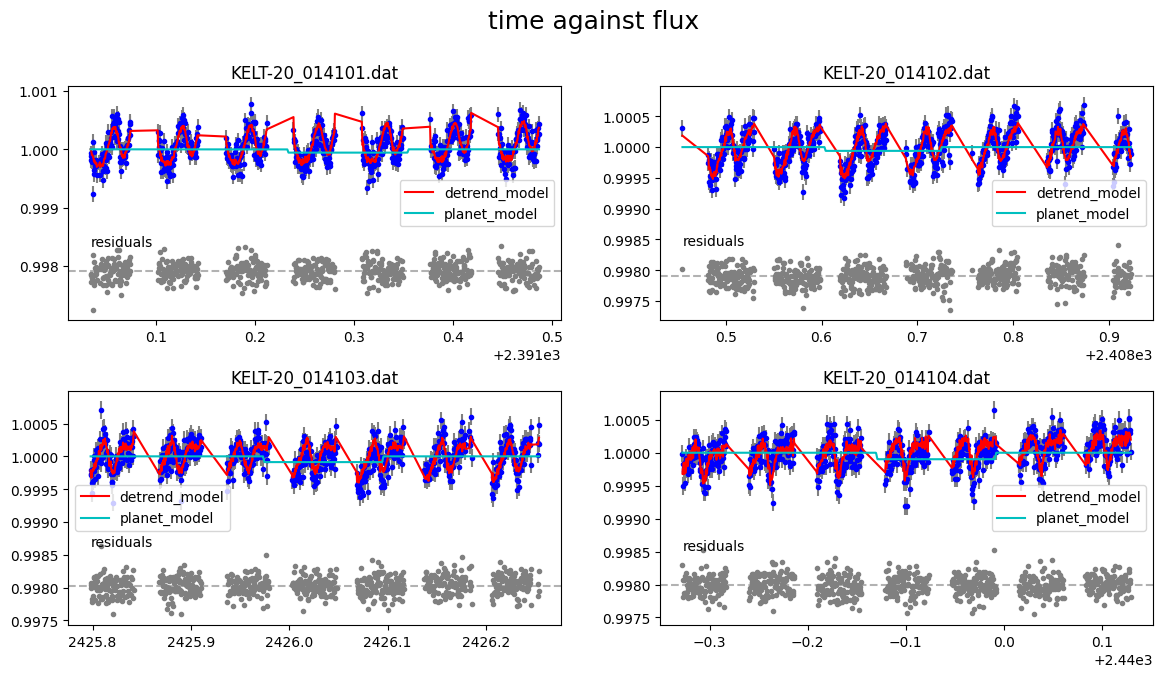

In [2]:
result.lc.plot_bestfit();

show chains and posteriors of the occulation depths

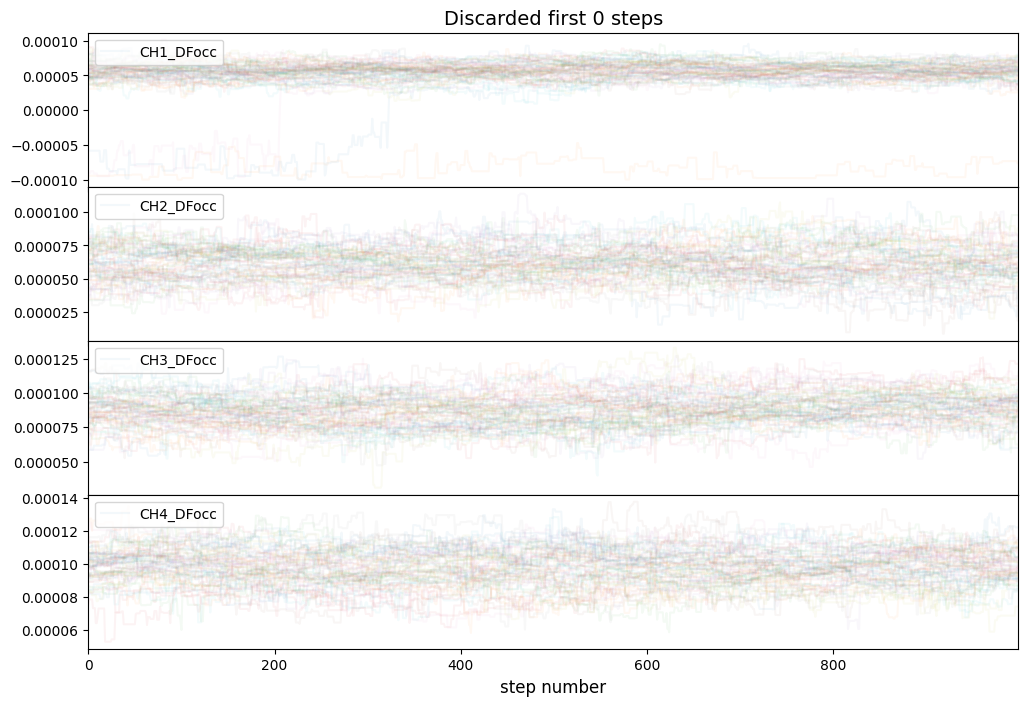

In [4]:
fig = result.plot_chains(pars=['CH1_DFocc', 'CH2_DFocc', 'CH3_DFocc', 'CH4_DFocc']);

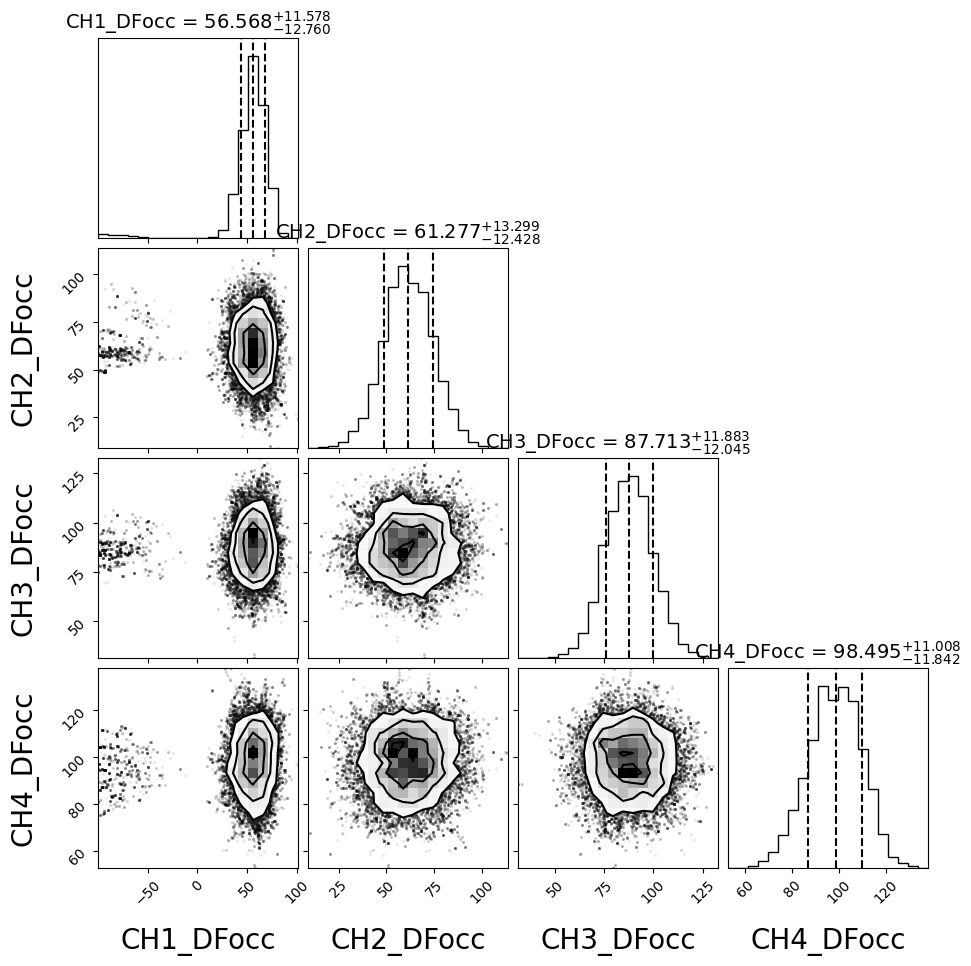

In [5]:
fig = result.plot_corner(pars = ['CH1_DFocc', 'CH2_DFocc', 'CH3_DFocc', 'CH4_DFocc'], multiply_by=1e6);

### result comparison

get median and standard deviation of the depths

In [6]:
depths = [np.median(result._chains[f"CH{i}_DFocc"])*1e6 for i in range(1,5)]
unc    = [np.mean(np.diff(np.quantile(result._chains[f"CH{i}_DFocc"],q=[0.16,0.5,0.84])))*1e6 for i in range(1,5)]

get median time of each occultation

In [11]:
mid_times = np.array([np.median(result.lc.outdata[nm]["time"]) for nm in result.lc.names])

- occultation depths derived in Singh,V +2023

In [12]:
paper_depth = [46,77,105,102]
paper_unc   = [14,14,14,14]

- occultation depths derived from `pycheops` analysis

In [19]:
pyc_depth  = [64,   70, 91, 98]
pyc_unc    = [12.5, 13, 12, 13]

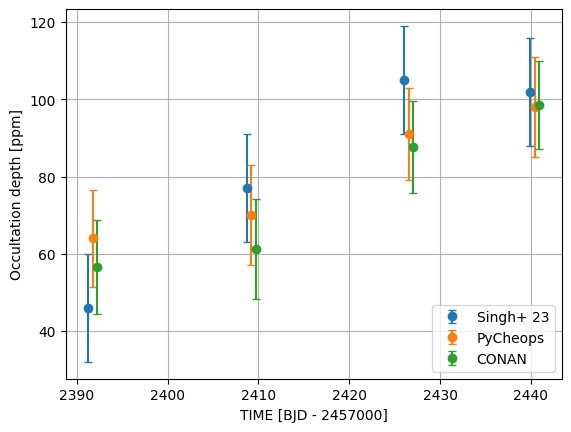

In [22]:
plt.errorbar(mid_times, paper_depth, paper_unc, fmt="o", capsize=3,label="Singh+ 23")
plt.errorbar(mid_times+0.5, pyc_depth, pyc_unc,  fmt="o", capsize=3, label="PyCheops")
plt.errorbar(mid_times+1, depths, unc, fmt="o", capsize=3, label="CONAN")

plt.grid()
plt.xlabel("TIME [BJD - 2457000]")
plt.ylabel("Occultation depth [ppm]")
plt.legend(loc="lower right");

The results agree with published values within one-sigma